In [ ]:
import sys
sys.path.append('..')

In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from src.utils.kaggle import download_kaggle_dataset
from src.nn_architectures.nn_scratch import NeuralNetworkFromScratch

In [14]:
DATASET = "rashikrahmanpritom/heart-attack-analysis-prediction-dataset"
LEARNING_RATE = 0.1
ITERATIONS = 1000

## Download and load data

In [9]:
download_kaggle_dataset(dataset_name=DATASET, path="data/")

Dataset URL: https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset


In [10]:
df = pd.read_csv("data/heart.csv")
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [11]:
X = np.array(df.drop("output", axis=1))
y = np.array(df["output"])

X.shape, y.shape

((303, 13), (303,))

## Simple feature engineering

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [13]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Train the model

In [16]:
nn = NeuralNetworkFromScratch(
    learning_rate=LEARNING_RATE, 
    X_train=X_train_scaled, 
    y_train=y_train, 
    X_test=X_test_scaled, 
    y_test=y_test
)

In [19]:
nn.train(ITERATIONS)

<Axes: >

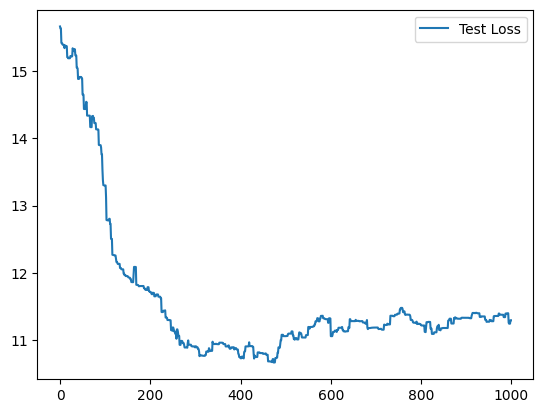

In [18]:
sns.lineplot(x=range(len(nn.L_test)), y=nn.L_test, label="Test Loss")

In [ ]:
total = X_test_scaled.shape[0]
correct = 0
y_preds = []
for i in range(total):
    y_true = y_test[i]
    y_pred = np.round(nn.forward(X_test_scaled[i]))
    y_preds.append(y_pred)
    correct += 1 if y_true == y_pred else 0
acc = correct / total
acc

In [ ]:
confusion_matrix(y_true=y_test, y_pred=y_preds)